In [43]:
from matplotlib import rcdefaults
rcdefaults()  # restore default matplotlib rc parameters
%config InlineBackend.figure_format='retina'   
import seaborn as sns  # wrapper for matplotlib that provides prettier styles and more
import matplotlib.pyplot as plt  # use matplotlib functionality directly
%matplotlib inline   
sns.set()

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

import numpy as np

In [136]:
def rk4(f,t0,y0,h,m):

    b21 = 1/2
    b31 = 0
    b32 = 3/4
    b41 = 2/9
    b42 = 0
    b43 = 1/3
    b51 = 1/6
    b52 = 1/3
    b53 = 1/3
    b54 = 1/6
        
    t = t0
    y = np.array(y0)

    ya = np.empty((len(y0),m+1))
    ya[:,0] = y
    ta = np.linspace(t0,t0+m*h,m+1)
     
    for k in range(m):
        t = t0 + k*h
        K1 = f(t,y)  
        y1 = y + h*b21*K1
        K2 = f(t+h*b21,y1)
        y2 = y + h*(b31*K1 + b32*K2)
        K3 = f(t+h*(b31    + b32   ), y2)
        y3 = y + h*(b41*K1 + b42*K2 + b43*K3)
        #K4 = f(t+h*(b31    + b32    + b43   ), y3)
        K4 = f(t+h*(b41    + b42    + b43   ), y3)
        y4 = y + h*(b51*K1 + b52*K2 + b53*K3 + b54*K4)
        y = y4
        ya[:,k+1] = y
        
    return ta,ya

-116.08319842706194 -17.392863672558207 9.999999999999998


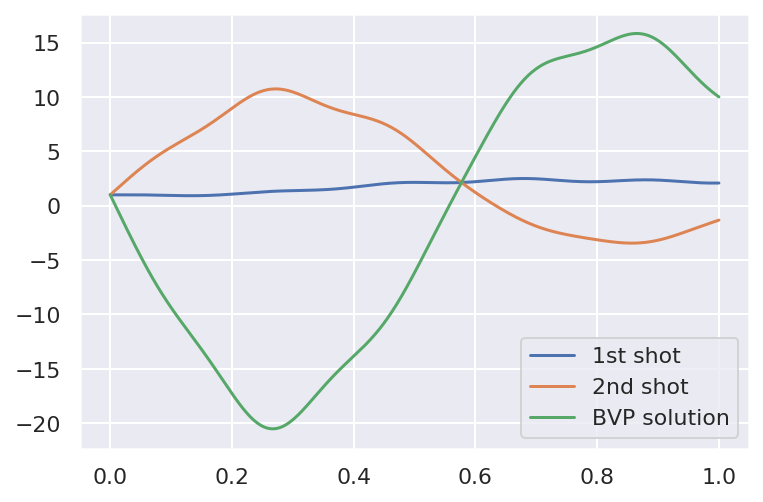

In [143]:
def f(x,Y):
    global p,q,phi
    y,yp = Y
    return np.array([ yp, phi(x) -p(x)*yp - q(x)*y ])

def p(x):   return 5*x**2
def q(x):   return 30+50*np.sin(30*x)
def phi(x): return 50*np.cosh(x)
x0,x1 = 0,1
alpha = 1
beta = 10
y0 = alpha

m = 501
h = (x1-x0)/m

sa = np.array([0,50])
y1a = np.empty(2)

for i, sigma in enumerate(sa):
    ta,Ya = rk4(f,x0,[y0,sigma],h,m)
    plt.plot(ta,Ya[0,:])
    y1a[i] = Ya[0,-1]
    
rho = (beta - y1a[0]) / (y1a[1] - y1a[0])
s3 = sa[0] + rho*(sa[1] - sa[0])

ta,Ya = rk4(f,x0,[y0,s3],h,m)
print(Ya[1,0], Ya[0,int(.2*(m-1))+1], Ya[0,-1])
plt.plot(ta,Ya[0,:])
plt.legend(['1st shot', '2nd shot', 'BVP solution']);

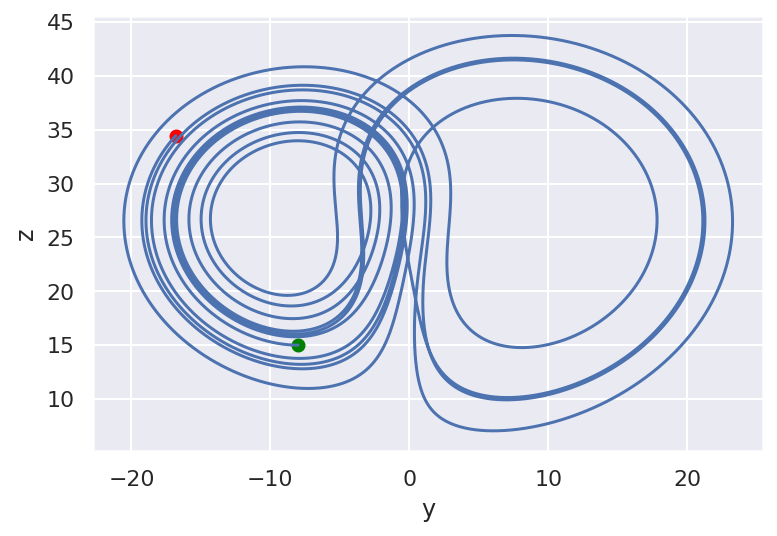

In [141]:
def f(t,Y):
    x,y,z = Y
    return np.array([10*y - 10*x,
                    28*x - y - x*z,
                    -8/3*z + x*y])

def Df(t,Y):
    x,y,z = Y
    return np.array([[-10, 10, 0],
                    [28 - z, -1, -x],
                    [y, x, -8/3]])

def Vp(t,Y,V):
    return np.matmul( Df(t,Y), V )

V0 = np.eye(3)
Y0 = np.array([-5, -8, 15])

def dZ(t,Z):
    V = Z[:-3].reshape((3,3))
    Y = Z[-3:]
    dV = Vp(t,Y,V)
    dY = f(t,Y)
    return np.append(dV.reshape(-1,1), dY)

Z0 = np.append(V0.reshape(-1,1), Y0)
t0 = 0
tf = 10.8
m = 10**5

h = (tf - t0)/m
ta,Ya = rk4(dZ,t0,Z0,h,m)
xa,ya,za = Ya[-3:,:]
plt.plot(ya,za)

V108 = Ya[:-3,-1].reshape((3,3))
plt.ylabel('z')
plt.xlabel('y')
plt.scatter(ya[0],za[0],color='green')
plt.scatter(ya[-1],za[-1],color='red');

In [144]:
V108

array([[   765.00518142,   -402.37548506,  -2779.39226176],
       [-21340.57373098,  11230.61544667,  77546.91600438],
       [-24387.79741035,  12833.67709144,  88618.62720697]])

In [142]:
np.linalg.svd(V108)

(array([[-0.02359625, -0.4832053 ,  0.87518904],
        [ 0.65834813, -0.66632028, -0.35013573],
        [ 0.75234365,  0.56791717,  0.33383996]]),
 array([1.23354255e+05, 3.82380994e-01, 6.65896392e-13]),
 array([[-0.26278447,  0.13828858,  0.95489297],
        [-0.64441677, -0.76173115, -0.06702741],
        [ 0.7181026 , -0.63296281,  0.2892866 ]]))